<a href="https://colab.research.google.com/github/SidneyWilcox/pythonObjectDetection/blob/main/linkedinLCNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import The Packages

In [ ]:
from keras.datasets import mnist
#from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load The Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Understanding The Image Data Fomat

In [ ]:
X_train[0].shape

(28, 28)

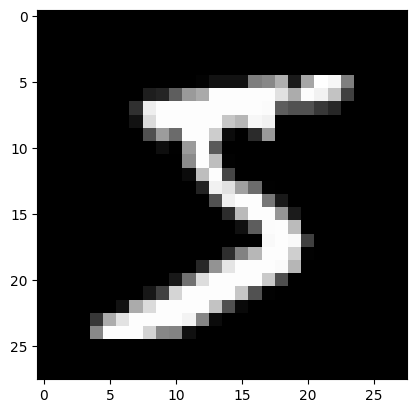

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
y_train[0]

5

Preprocessing The Image Data

In [ ]:
image_height, image_width = 28,28

In [ ]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
print(X_train[0])
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])
print(X_test[0])

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Build A Model

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

Compile The Model


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [ ]:
First Layer = # of parmeters = 784 inputs * 512 nodes + 512 Bias = 401920

In [ ]:
Second Layer  = # of parmeters = 512 input nodes * 512 nodes + 512 parmeters = 262656

In [ ]:
Third Layer= 512 nodes * 10 nodes + 10 Bias = 5130

Train The Model

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1830 - accuracy: 0.9455 - val_loss: 0.1012 - val_accuracy: 0.9686
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0793 - accuracy: 0.9749 - val_loss: 0.0990 - val_accuracy: 0.9709
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0546 - accuracy: 0.9827 - val_loss: 0.0719 - val_accuracy: 0.9783
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0791 - val_accuracy: 0.9781
Epoch 5/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0743 - val_accuracy: 0.9808
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0671 - val_accuracy: 0.9810
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0859 - val_ac

WhAT IS THE Accuracy of the Model?


Plot the Accuracy of the model


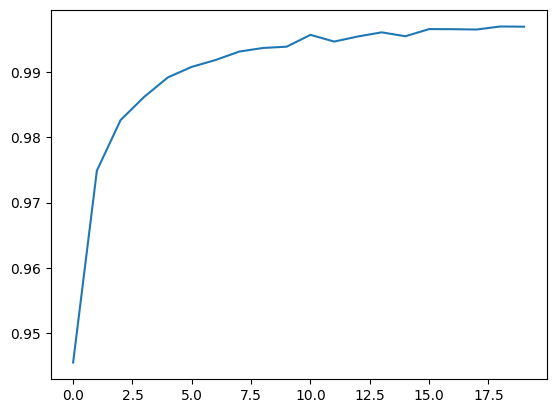

In [ ]:
plt.plot(history.history['accuracy'])

Accuracy of Training and Validation With Loss

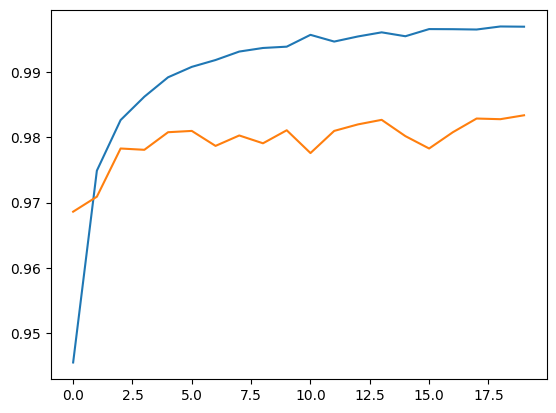

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

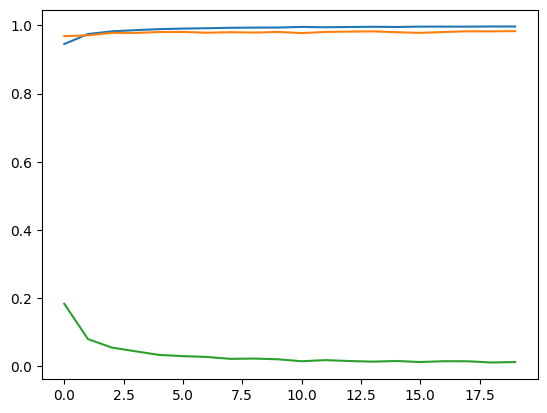

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])


Evaluating The Model

In [ ]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1311 - accuracy: 0.9834


In [ ]:
score

[0.1310923546552658, 0.9833999872207642]